## Warmup Exercise

Return the 5x5 identity matrix 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib notebook


In [2]:
A = np.identity(5); A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Linear Regression with one variable

In [3]:
data = pd.read_csv('ex1/ex1data1.txt', sep=",", header=None);
data.columns = ['X', 'y'];

In [4]:
m = len(data); print(m)

97


<function matplotlib.pyplot.close(fig=None)>

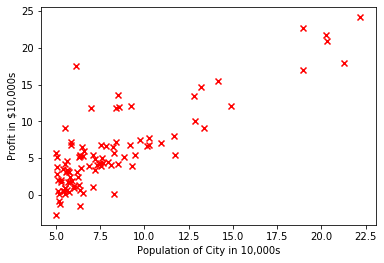

In [5]:
plt.figure()
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.scatter(data.X, data.y, marker='x', color='red')
plt.close

In [6]:
X = data.X; y = data.y; 

In [7]:
X = pd.DataFrame(X); X.insert(0, 'theta_0', np.ones((m,1))); 
X = np.transpose(X); X.shape

(2, 97)

In [8]:
theta = np.zeros((1,2));

In [9]:
alpha = 0.01

### Computing the Cost

In [10]:
y = y[:, None]; y.shape

(97, 1)

In [11]:
def h(theta, x):
    return (theta @ x)

In [12]:
def compute_cost(X, theta, y):
    m = X.shape[1]
    h_x = h(theta, X)
    error = h_x.transpose() - y
    sq_error = error ** 2
    sse = np.sum(sq_error)
    return sse / (2* m)

In [13]:
J = compute_cost(X, theta, y); J

0    32.072734
dtype: float64

### Gradient Descent

In [14]:
def grad_descent(X, y, theta, alpha, i):
    h_x = h(theta, X)
    m = X.shape[1]
    x = X.iloc[i, :][:, None]
    error = h_x.transpose() - y
    sigma = np.sum(error * x)
    return alpha / m * sigma

In [15]:
def cost_history(X, y, theta, alpha, num_iterations, initial_cost):
    J = []
    theta0 = []
    theta1 = []
    for num in range(num_iterations):
        theta[0,0] = theta[0,0] - grad_descent(X, y, theta, alpha, 0)
        theta[0,1] = theta[0,1] - grad_descent(X, y, theta, alpha, 1)
        J.append(compute_cost(X, theta, y))
        theta0.append(theta[0,0])
        theta1.append(theta[0,1])
    return J, theta0, theta1

In [16]:
J_history, theta0, theta1 = cost_history(X, y, theta, 0.01, 1500, initial_cost = J)

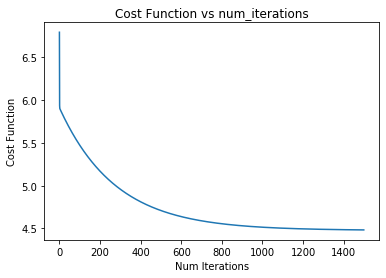

In [17]:
plt.figure()
plt.plot(range(1500), J_history)
plt.ylabel('Cost Function')
plt.xlabel('Num Iterations')
plt.title('Cost Function vs num_iterations')
plt.show()

In [18]:
predict_1 = theta @ [1, 3.5]; predict_1

array([0.44839858])

In [19]:
predict_2 = theta @ [1, 7]; predict_2

array([4.53286063])

<function matplotlib.pyplot.close(fig=None)>

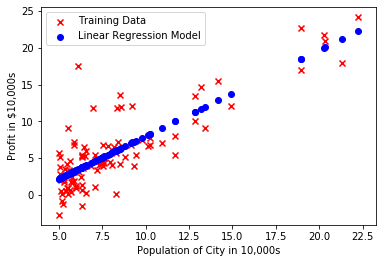

In [23]:
plt.figure()
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.scatter(data.X[:, None], data.y, marker='x', color='red')
plt.scatter(data.X[:, None], (theta @ X).transpose(), marker = 'o', color='blue')
plt.legend(['Training Data', 'Linear Regression Model'])
plt.close

## Linear Regression with multiple variables

In [ ]:
df = pd.read_csv('ex1/ex1data2.txt', sep=",", header=None);
df.columns = ['size', 'num_bedrooms', 'price'];

In [ ]:
X = df.drop('price', axis = 1); y = df['price'][:, None]

In [ ]:
def normalize(X):
    for feature in X.columns:
        mean = np.mean(X[feature])
        std = np.std(X[feature])
        X[feature] = (X[feature] - mean) / std
    return X

In [ ]:
X = normalize(X); 

In [ ]:
x0 = np.ones((len(X),1))

In [ ]:
X.insert(0, 'x0', x0); X = X.T

In [ ]:
theta = np.zeros((1,3)); 

In [ ]:
def h(theta, x):
    return (theta @ x)

In [ ]:
def compute_cost(X, theta, y):
    m = X.shape[1]
    h_x = h(theta, X)
    error = h_x.transpose() - y
    sq_error = error ** 2
    sse = np.sum(sq_error)
    return sse / (2* m)

In [ ]:
def grad_descent(X, y, theta, alpha, i):
    h_x = h(theta, X)
    m = X.shape[1]
    x = X.iloc[i, :][:, None]
    error = h_x.transpose() - y
    sigma = np.sum(error * x)
    return alpha / m * sigma

In [ ]:
def cost_history(X, y, theta, alpha, num_iterations):
    cost = []
    for num in range(num_iterations):
        for index in range(theta.shape[1]):
            theta[0,index] = theta[0,index] - grad_descent(X, y, theta, alpha, index)
        cost.append(compute_cost(X, theta, y))
    return cost

In [ ]:
J = cost_history(X, y, theta, .001, 1500)

In [ ]:
plt.figure()
for lr in [.001, 0.05, .1, 0.5]:
    theta = np.zeros((1,3))
    plt.plot(range(150), cost_history(X, y, theta, lr, 150))
plt.legend(['.001', '.05', '0.1', '0.5'])
plt.ylabel('Cost Function')
plt.xlabel('Num Iterations')
plt.title('Cost Function vs num_iterations')
plt.show()

In [ ]:
theta

In [ ]:
x = pd.DataFrame([1, 1650, 3]); x = normalize(x); x.iloc[0] = 1; 

In [ ]:
x

In [ ]:
prediction = theta @ x; prediction

In [ ]:
X = X.T

In [ ]:
x0 = np.ones((len(X),1))

In [ ]:
X.insert(0, 'x0', x0);

## Normal Equation

In [ ]:
def normal_eq(X, y):
    return np.linalg.pinv(X.T @ X) @ (X.T @ y)


In [ ]:
thetas = normal_eq(X,y); thetas = thetas.T; thetas

In [ ]:
input = pd.DataFrame([1, 1650, 3]); input.shape

In [ ]:
prediction = thetas @ input; print(prediction)